#**Implementing Text clustering using various algorithms**

In [ ]:
#Importing the required modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,MiniBatchKMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,homogeneity_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# reading the data
df=pd.read_csv('Bishop.csv')

In [ ]:
df.head()

,Unnamed: 0,topic,text
0,0,[introduction],problem searching patterns data fundamental o...
1,1,"[example, polynomial, curve, fitting]",begin introducing simple regression problem s...
2,2,"[probability, theory]",key concept ﬁeld pattern recognition uncertai...
3,3,"[probability, theory, probability, densities]",well considering probabilities deﬁned discret...
4,4,"[probability, theory, expectations, covariances]",one important operations involving probabilit...


In [ ]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0    0
topic         0
text          0
dtype: int64

In [ ]:
# Dropping the unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

(-0.5, 399.5, 199.5, -0.5)

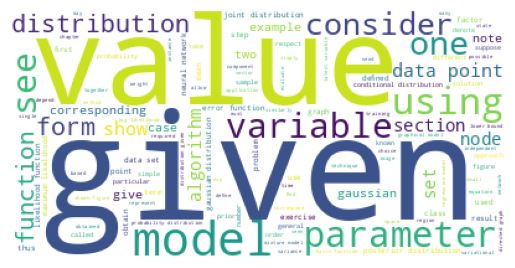

In [ ]:
# Visualizing the most frequently occuring words in the text column
from wordcloud import WordCloud
wordcloud=WordCloud(width=400,height=200,background_color='white').generate(' '.join(df['text']))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# Vectorizing the text
tfidf=TfidfVectorizer()

In [ ]:
x=df['text']

In [ ]:
lb=LabelEncoder()
y_true=lb.fit_transform(df['topic'])

In [ ]:
X=tfidf.fit_transform(x)

## **KMeans Clustering**

In [ ]:
d=[]
s=[]
for i in range(2,21):
  km=KMeans(n_clusters=i,random_state=32)
  km.fit(X)
  cluster_labels=km.predict(X)
  sil=silhouette_score(X,cluster_labels)
  s.append(sil)
  d.append(km.inertia_)

In [ ]:
optimalk=s.index(max(s))+2

Text(0.5, 1.0, 'Elbow method')

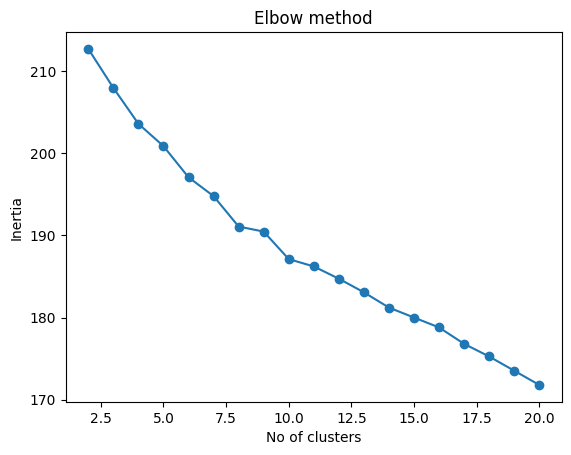

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,21),d,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.title("Elbow method")

In [ ]:
optimalk

10

In [ ]:
kmeans=KMeans(n_clusters=10,random_state=12)
kmeans.fit(X)
cluster_labels=kmeans.predict(X)
sil_kmeans=silhouette_score(X,cluster_labels)
homo_kmeans=homogeneity_score(y_true,cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Silhouette Score: ',sil_kmeans)
print('Homogeneity Score: ',homo_kmeans)

Silhouette Score:  0.03444290527497685
Homogeneity Score:  0.3986999074824285


In [ ]:
# Reducing the dimensionality using SVD
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=2,random_state=42)
x2=svd.fit_transform(X)

In [ ]:
svd.singular_values_

array([5.28971851, 2.786926  ])

Text(0, 0.5, 'Dimension 2')

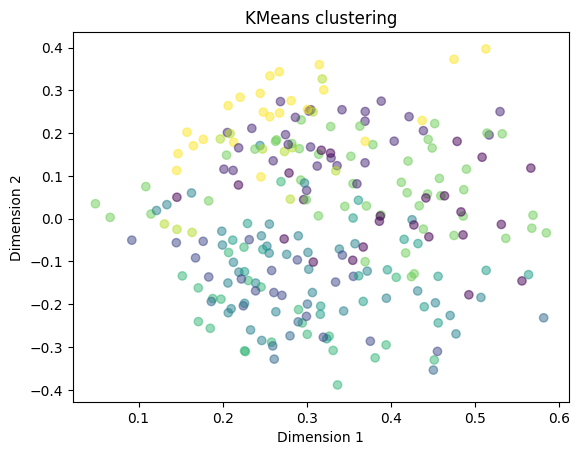

In [ ]:
# Visualizing the cluster obtained using KMeans
plt.scatter(x2[:,0],x2[:,1],c=cluster_labels,alpha=0.5)
plt.title('KMeans clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

In [ ]:
# Predicted clusters using KMeans
df['predicted_cluster_kmeans']=cluster_labels
df

,topic,text,topic_label,predicted_cluster_kmeans
0,[introduction],problem searching patterns data fundamental o...,[introduction],8
1,"[example, polynomial, curve, fitting]",begin introducing simple regression problem s...,"[example, polynomial, curve, fitting]",7
2,"[probability, theory]",key concept ﬁeld pattern recognition uncertai...,"[probability, theory]",4
3,"[probability, theory, probability, densities]",well considering probabilities deﬁned discret...,"[probability, theory, probability, densities]",4
4,"[probability, theory, expectations, covariances]",one important operations involving probabilit...,"[probability, theory, expectations, covariances]",4
...,...,...,...,...
239,"[combining, models, wishart]",wishart distribution conjugate prior precisio...,"[combining, models, wishart]",4
240,"[combining, models, basic, matrix, identities]",matrix elements indexes rows indexes columns ...,"[combining, models, basic, matrix, identities]",4
241,"[combining, models, traces, determinants]",trace determinant apply square matrices trace...,"[combining, models, traces, determinants]",4
242,"[combining, models, matrix, derivatives]",sometimes need consider derivatives vectors m...,"[combining, models, matrix, derivatives]",4


## **MiniBatch KMeans**

In [ ]:
# MiniBatch Kmeans clustering
mkm=MiniBatchKMeans(n_clusters=10,random_state=12)
mkm.fit(X)
cl=mkm.predict(X)
sil_mbkm=silhouette_score(X,cl)
print('Silhoette Score:',sil_mbkm)
h=homogeneity_score(y_true,cl)
print('Homogeneity Score:',h)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhoette Score: 0.019076325484181325
Homogeneity Score: 0.35866923638609777


Text(0.5, 1.0, 'MiniBatch Kmeans')

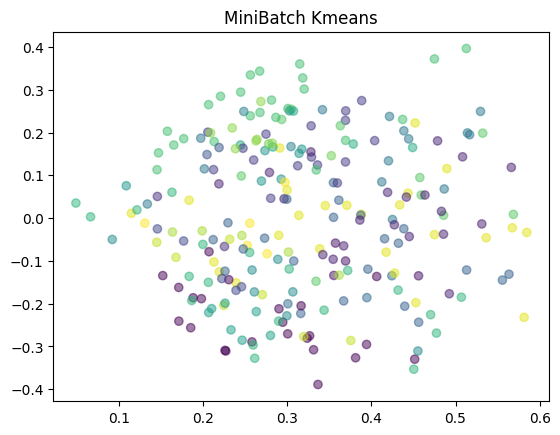

In [ ]:
svd=TruncatedSVD(n_components=2,random_state=12)
x2=svd.fit_transform(X)
plt.scatter(x2[:,0],x2[:,1],c=cl,alpha=0.5)
plt.title('MiniBatch Kmeans')

In [ ]:
df['predicted_cluster_minibatch']=cl
df

,topic,text,topic_label,predicted_cluster_kmeans,predicted_cluster_minibatch
0,[introduction],problem searching patterns data fundamental o...,[introduction],8,1
1,"[example, polynomial, curve, fitting]",begin introducing simple regression problem s...,"[example, polynomial, curve, fitting]",7,5
2,"[probability, theory]",key concept ﬁeld pattern recognition uncertai...,"[probability, theory]",4,1
3,"[probability, theory, probability, densities]",well considering probabilities deﬁned discret...,"[probability, theory, probability, densities]",4,7
4,"[probability, theory, expectations, covariances]",one important operations involving probabilit...,"[probability, theory, expectations, covariances]",4,7
...,...,...,...,...,...
239,"[combining, models, wishart]",wishart distribution conjugate prior precisio...,"[combining, models, wishart]",4,1
240,"[combining, models, basic, matrix, identities]",matrix elements indexes rows indexes columns ...,"[combining, models, basic, matrix, identities]",4,2
241,"[combining, models, traces, determinants]",trace determinant apply square matrices trace...,"[combining, models, traces, determinants]",4,1
242,"[combining, models, matrix, derivatives]",sometimes need consider derivatives vectors m...,"[combining, models, matrix, derivatives]",4,2


## **Agglomerative clustering**

In [ ]:
ag=AgglomerativeClustering(n_clusters=10,linkage='ward')
ag.fit(X.toarray())
cl=ag.fit_predict(X.toarray())

In [ ]:
sil_agg=silhouette_score(X,cl)
sil_agg

0.03721325064035933

In [ ]:
homo_agg=homogeneity_score(y_true,cl)
homo_agg

0.40562282538172073

Text(0.5, 0, 'Dimension 2')

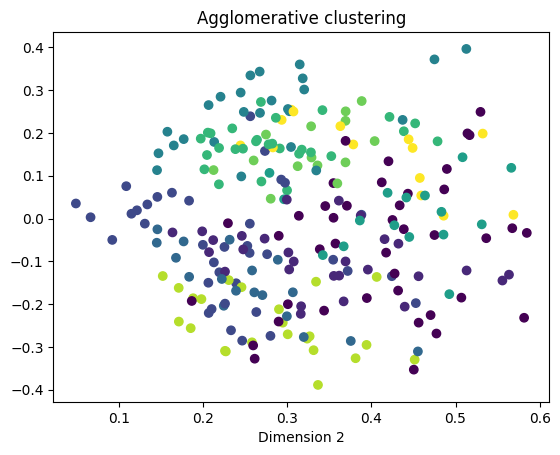

In [ ]:
plt.scatter(x2[:,0],x2[:,1],c=cl)
plt.title('Agglomerative clustering')
plt.xlabel('Dimension 1')
plt.xlabel('Dimension 2')

In [ ]:
df['predicted_cluster_agglomerative']=cl
df

,topic,text,topic_label,predicted_cluster_kmeans,predicted_cluster_minibatch,predicted_cluster_agglomerative
0,[introduction],problem searching patterns data fundamental o...,[introduction],8,1,2
1,"[example, polynomial, curve, fitting]",begin introducing simple regression problem s...,"[example, polynomial, curve, fitting]",7,5,6
2,"[probability, theory]",key concept ﬁeld pattern recognition uncertai...,"[probability, theory]",4,1,2
3,"[probability, theory, probability, densities]",well considering probabilities deﬁned discret...,"[probability, theory, probability, densities]",4,7,2
4,"[probability, theory, expectations, covariances]",one important operations involving probabilit...,"[probability, theory, expectations, covariances]",4,7,2
...,...,...,...,...,...,...
239,"[combining, models, wishart]",wishart distribution conjugate prior precisio...,"[combining, models, wishart]",4,1,2
240,"[combining, models, basic, matrix, identities]",matrix elements indexes rows indexes columns ...,"[combining, models, basic, matrix, identities]",4,2,2
241,"[combining, models, traces, determinants]",trace determinant apply square matrices trace...,"[combining, models, traces, determinants]",4,1,2
242,"[combining, models, matrix, derivatives]",sometimes need consider derivatives vectors m...,"[combining, models, matrix, derivatives]",4,2,2


In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
z=linkage(X.toarray(),'ward')

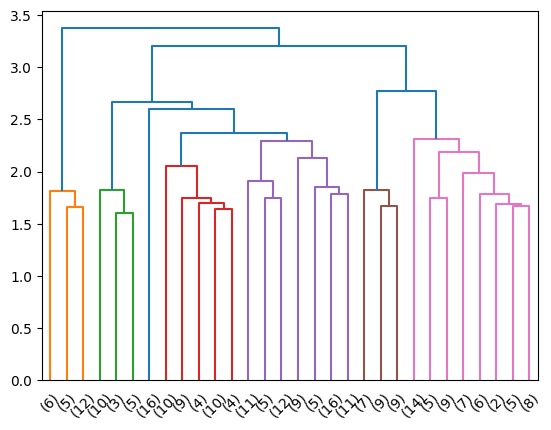

In [ ]:
d=dendrogram(z,truncate_mode='lastp')

In [ ]:
# Comparing the evaluation metrics of clusters to choose a suitable one
kmeans={'Silhouette score':sil_kmeans,'Homogeneity score':homo_kmeans}
minibatchk={'Silhouette score':sil_mbkm,'Homogeneity score':h}
agg={'Silhoette score':sil_agg,'Homogeneity score':homo_agg}

## **Results**

In [ ]:
print('Kmeans')
print(kmeans)
print('--------------------------------------------------------------')
print('Mini Batch KMeans')
print(minibatchk)
print('--------------------------------------------------------------')
print('Agglomerative')
print(agg)
print('--------------------------------------------------------------')

Kmeans
{'Silhouette score': 0.03444290527497685, 'Homogeneity score': 0.3986999074824285}
--------------------------------------------------------------
Mini Batch KMeans
{'Silhouette score': 0.019076325484181325, 'Homogeneity score': 0.35866923638609777}
--------------------------------------------------------------
Agglomerative
{'Silhoette score': 0.03721325064035933, 'Homogeneity score': 0.40562282538172073}
--------------------------------------------------------------
